# Netflix is an application that keeps growing bigger and faster with its popularity.

#This is an EDA through its data with a wide range of different graphs and visuals along with a content-based recommendation system.

![](https://media.giphy.com/media/oenruB2DKC7p6/giphy.gif)

#Importing Libraries

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [12]:
netflix_overall=pd.read_csv("/content/netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [14]:
netflix_overall.shape

(8807, 12)

In [15]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']


In [16]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

# Analysis of Movies vs TV Shows.

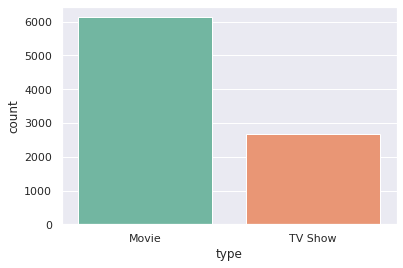

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

It is evident that there are more Movies on Netflix than TV shows.

# If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

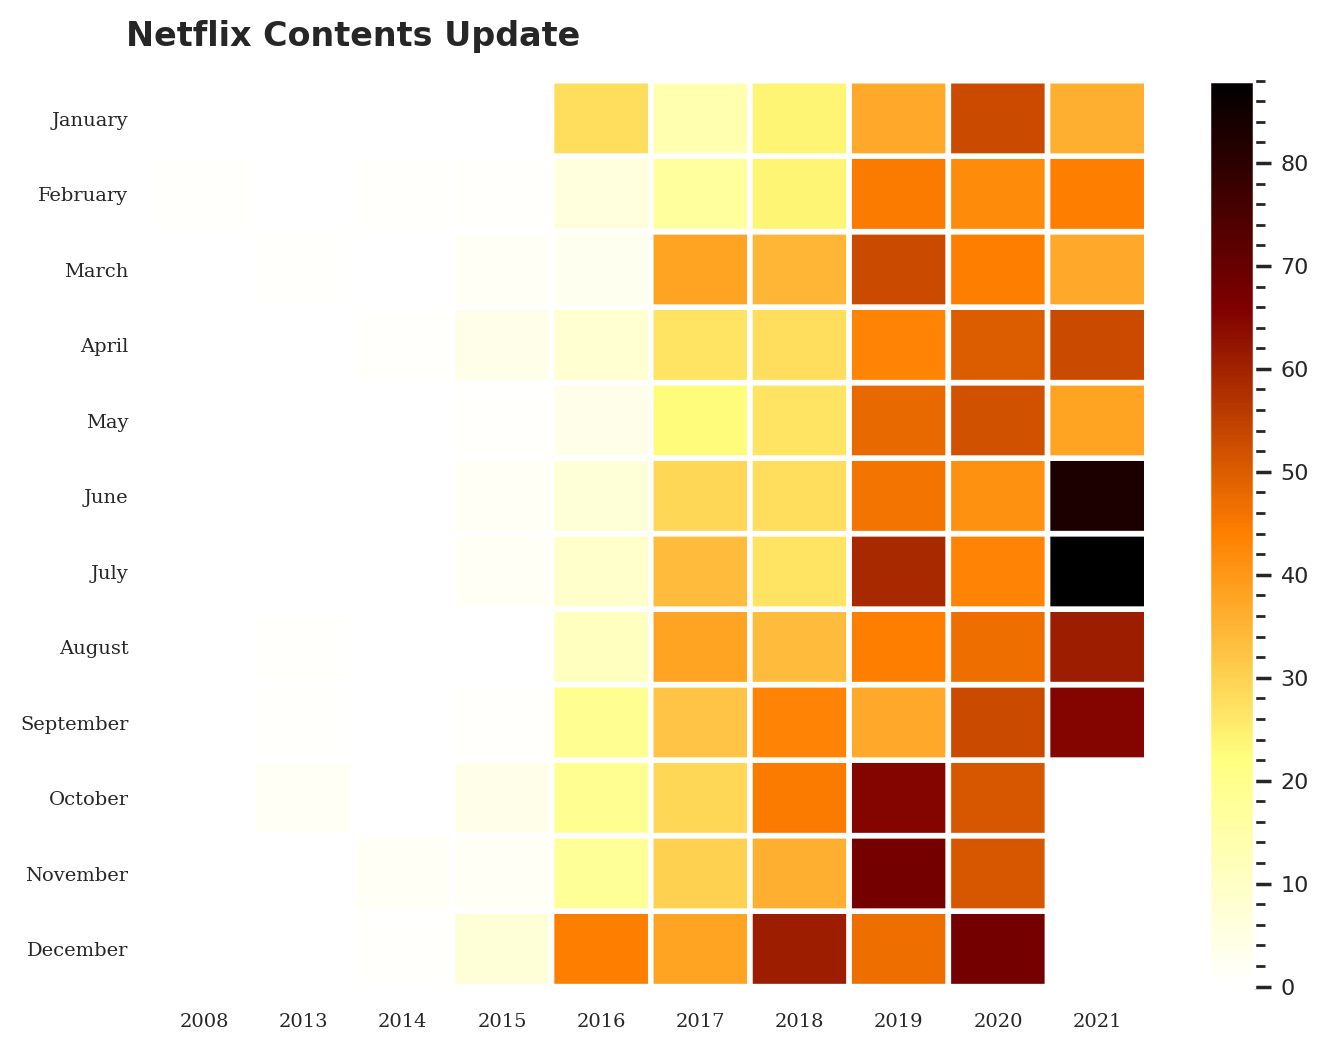

In [84]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(8, 6), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

If the latest year 2019, 2020, 2021 is considered, January and february were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

# Movie ratings analysis

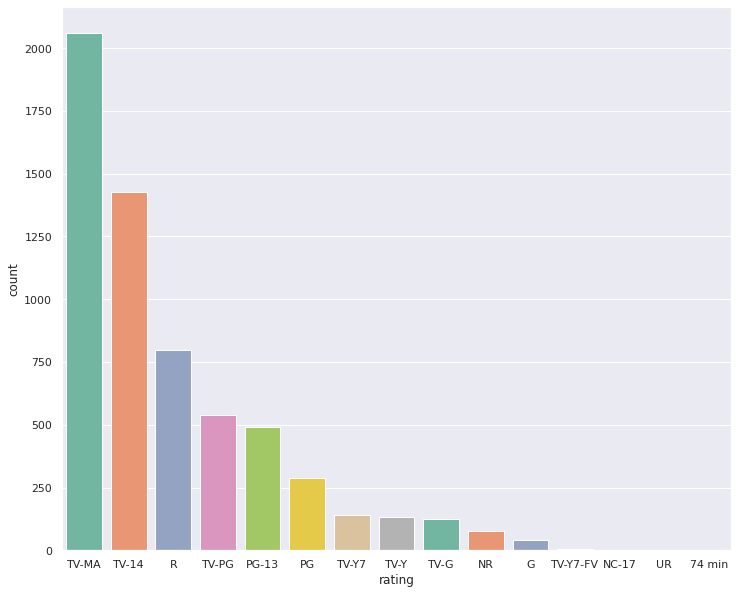

In [19]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. 

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the  very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

# Analysing IMDB ratings to get top rated movies on Netflix

Now we will add 3 different dataset from imdb, to further analysis and creating recommendation systems.

In [20]:
imdb_ratings=pd.read_csv('/content/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('/content/IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(85852, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [21]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [83]:
ratings.head(1)

,Title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance


In [79]:
rating = pd.read_csv('/content/IMDb ratings.csv')
rating.head(3)

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0


In [81]:
movies=pd.read_csv('/content/IMDb movies.csv')
movies.head(1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0


In [82]:
users=pd.read_csv('/content/IMDb names.csv')
users.head(1)

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0


Top rated 10 movies on Netflix are:

In [85]:
import plotly.express as px
top_rated=joint_data[0:20]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

Countries with highest rated content.

In [23]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,865
India,718
United Kingdom,119
Canada,57
Philippines,50
Spain,41
Indonesia,38
South Korea,38
France,37
Nigeria,31


In [104]:
import plotly.express as px

data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
#fig = px.funnel(data, x='number', y='country')

fig = px.bar(data, x='number', y='country',color="country",
             pattern_shape="country")
fig.show()

# Year wise analysis

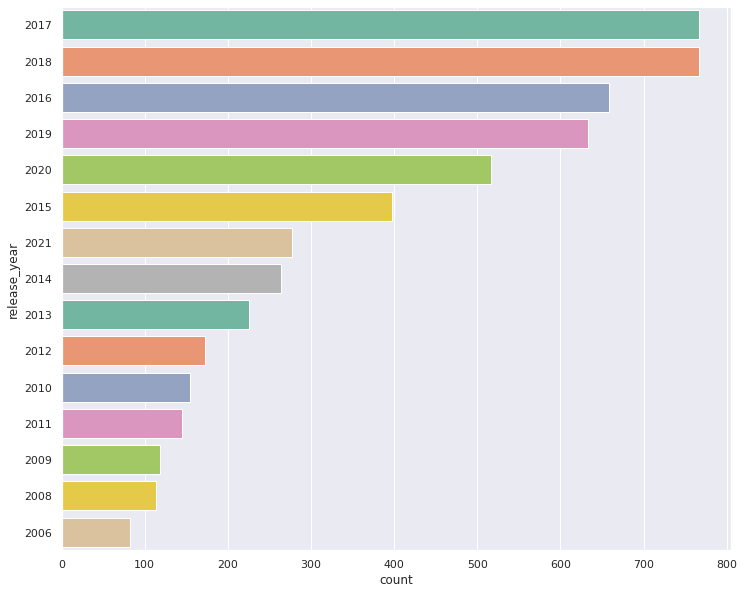

In [25]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

So, 2017 was the year when most of the movies were released.

In [26]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}


# TOP 10 MOVIE CONTENT CREATING COUNTRIES

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'India')]

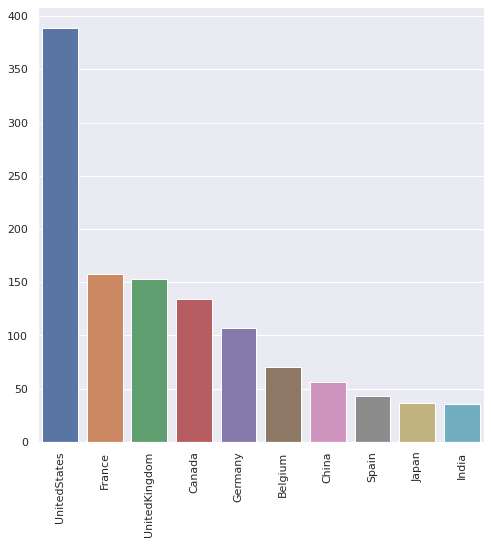

In [28]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)


# Analysis of duration of movies

In [29]:
netflix_movies['duration']=netflix_movies['duration'].astype(str).str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(float)
netflix_movies['duration']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 6131, dtype: float64

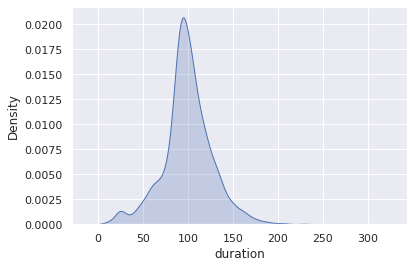

In [30]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting. Can you? :p

In [31]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# WordCloud for Genres.

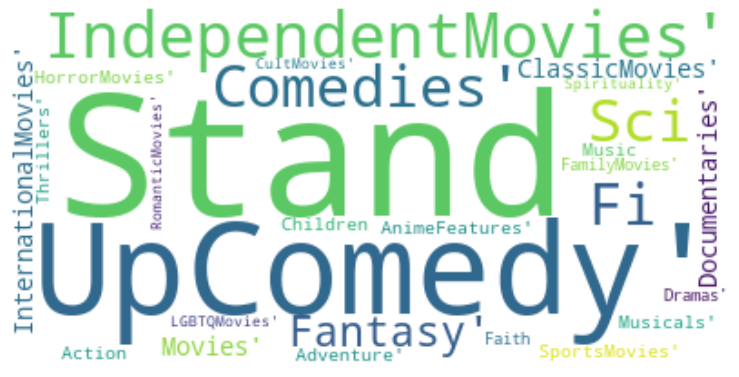

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
#mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Lollipop plot of Genres vs their count on Netflix

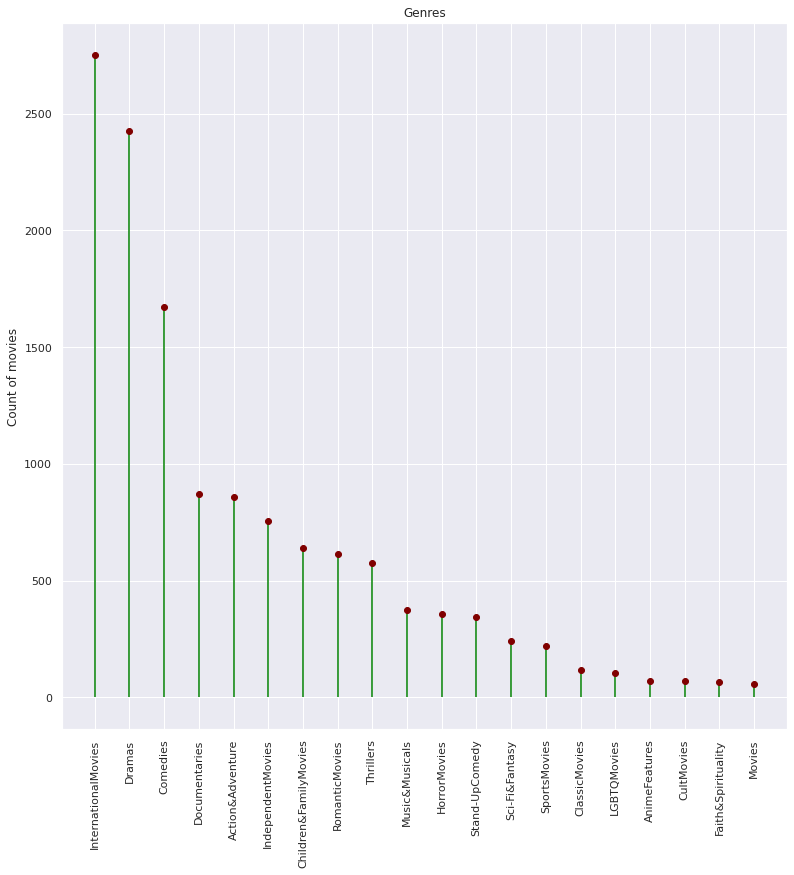

<Figure size 720x720 with 0 Axes>

In [33]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

Therefore, it is clear that international movies, dramas and comedies are the top three genres that have the highest amount of content on Netflix.

# Analysis of TV SERIES on Netflix

In [34]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}


# Most content creating countries

Text(0, 0.5, 'Arrival delay (in minutes)')

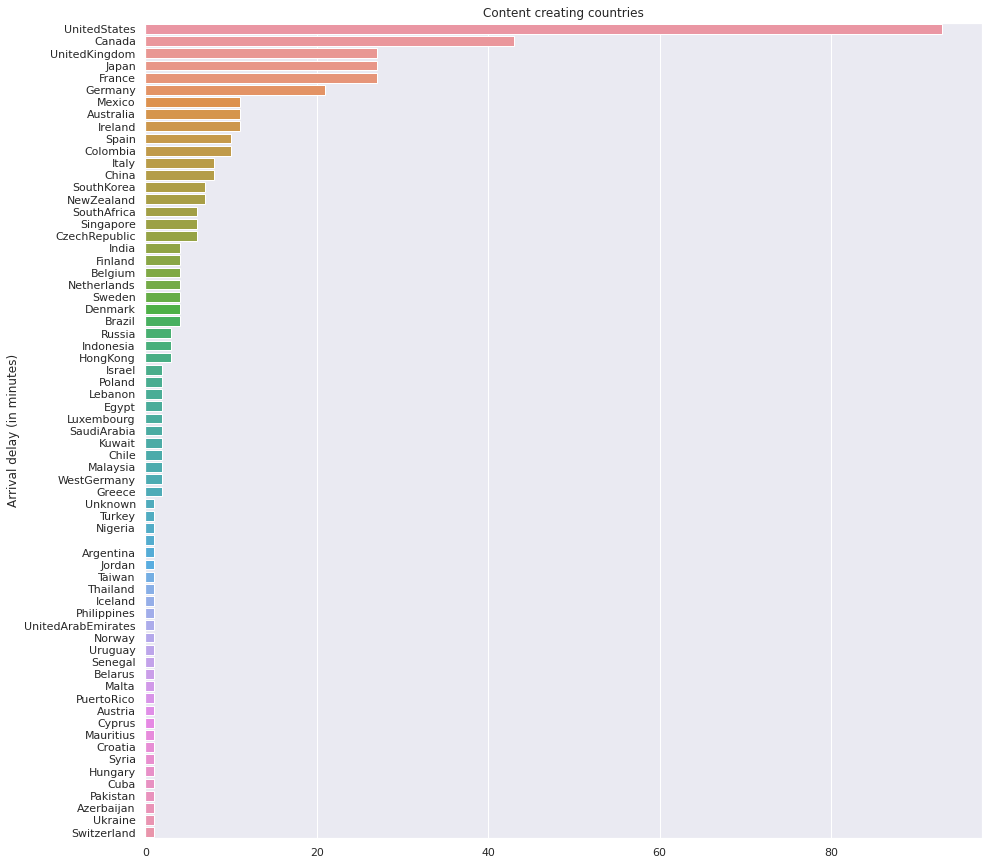

In [36]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Naturally, United States has the most content that is created on netflix in the tv series category.

In [37]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# TV shows with largest number of seasons

In [39]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

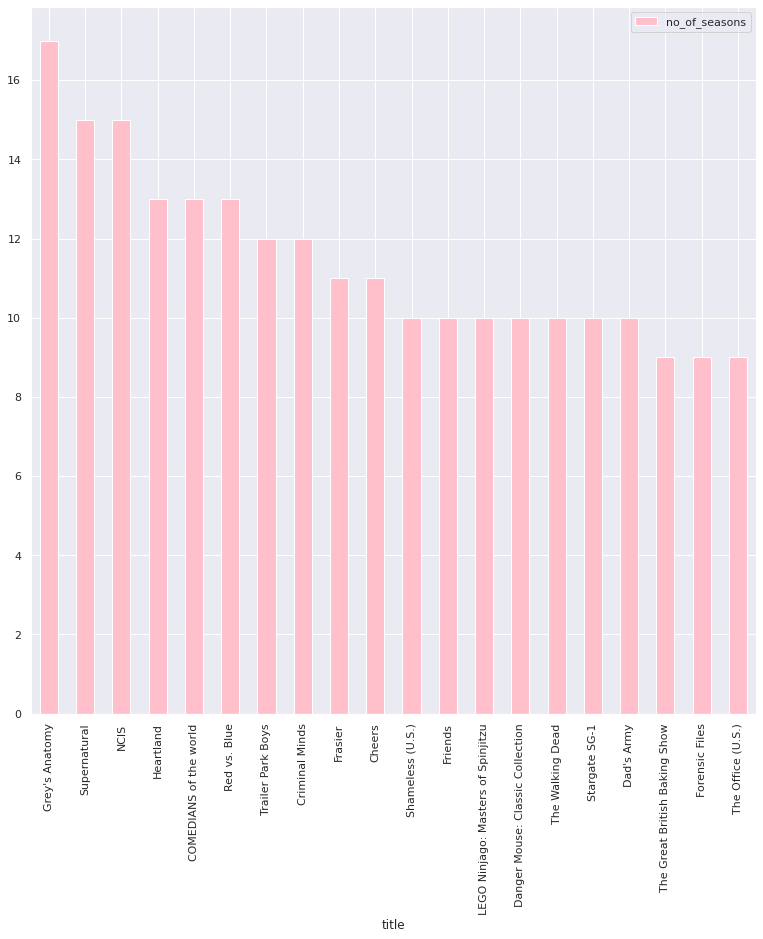

In [40]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='pink')

Thus, NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.

# Lowest number of seasons.

In [41]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

These are some binge-worthy shows that are short and have only one season.

In [42]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# Word Cloud for Genres

A word cloud is an image made of words that together resemble a cloudy shape.

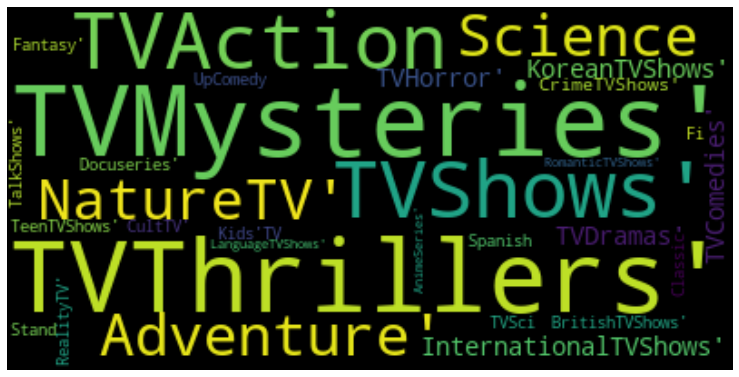

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

#mask=np.array(Image.open('../input/masks/upvote.png'))
wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [45]:
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [46]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show()

Above table shows the oldest US tv shows on Netflix.

In [47]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [48]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

The above are latest released US television shows!

# Content in France

In [49]:
netflix_fr=netflix_overall[netflix_overall['country']=='France']
nannef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()


It is very interesting to note that the content in France is very rational. There is no director in the data who has a large number of movies. In my opinion, it shows how different directors are given a chance to showcase their talents. What do you think?

In [50]:
newest_fr_series=netflix_fr.sort_values(by='release_year', ascending=False)[0:20]

In [51]:
newest_fr_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
91,s92,Movie,The Women and the Murderer,"Mona Achache, Patricia Tourancheau",NaN,France,"September 9, 2021",2021,TV-14,92 min,"Documentaries, International Movies",This documentary traces the capture of serial ...
1110,s1111,Movie,Madame Claude,Sylvie Verheyde,"Karole Rocher, Garance Marillier, Roschdy Zem,...",France,"April 2, 2021",2021,TV-MA,113 min,"Dramas, International Movies","In 1960s Paris, Madame Claude's influence exte..."
1329,s1330,Movie,The Misadventures of Hedi and Cokeman,Julien Royal,"Hedi Bouchenafa, Nassim Lyes, Fred Testot, Jul...",France,"February 10, 2021",2021,TV-MA,99 min,"Comedies, International Movies","In Paris, two dysfunctional dealers use family..."
1223,s1224,TV Show,Dealer,"Ange Basterga, Nicolas Lopez","Abdramane Diakité, Mohamed Boudouh, Sébastien ...",France,"March 10, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Tensions erupt when two filmmakers infiltrate ...
1236,s1237,Movie,Sentinelle,Julien Leclercq,"Olga Kurylenko, Marilyn Lima, Michel Nabokoff,...",France,"March 5, 2021",2021,TV-MA,81 min,"Action & Adventure, Dramas, International Movies",Transferred home after a traumatizing combat m...
299,s300,Movie,The Swarm,Just Philippot,"Suliane Brahim, Sofian Khammes, Marie Narbonne...",France,"August 6, 2021",2021,TV-14,102 min,"Horror Movies, Independent Movies, Internation...",A single mother breeds locusts as high-protein...
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
2797,s2798,TV Show,Vampires,NaN,"Oulaya Amamra, Suzanne Clément, Kate Moran, Mo...",France,"March 20, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror","A Paris teen who's half human, half vampire gr..."
2675,s2676,TV Show,Fary : Hexagone,"Adrien Lagier, Ousmane Ly",Fary,France,"April 16, 2020",2020,TV-MA,2 Seasons,"International TV Shows, Stand-Up Comedy & Talk...",French comedy phenom Fary puts a playful spin ...
3433,s3434,TV Show,The Hook Up Plan,NaN,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,"October 11, 2019",2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her..."


In [52]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_fr_series['title'],newest_fr_series['release_year']]))
                     ])
fig.show()

# Top Duration

In [53]:
topdirs=pd.value_counts(netflix_overall['duration'])
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

It can be inferred that having one season is the most preferred duration.

## A little interesting history

Even though it may look like Netflix is fairly new, it has been around since 1997! 

Here's a picture of the older Netflix website when rentals costed only 50 cents each and the website had only about 900 titles.

![](https://producthabits.com/wp-content/uploads/2018/04/Screenshot-2018-03-26-16.08.07.png)

# Recommendation System (Content Based)

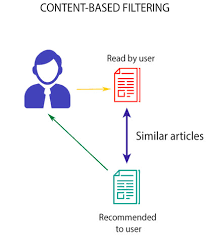

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(8807, 18895)

There are about 16151 words described for the 6234 movies in this dataset.

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

<img src='https://i.stack.imgur.com/36r1U.png'>

In [56]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [57]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [58]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

This recommendation is just based on the Plot.

In [59]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [60]:
get_recommendations('Mortel')

256                       Nneka The Pretty Serpent
3674                  PILI Fantasy: War of Dragons
800                                Mosquita y Mari
4511         Edgar Rice Burroughs' Tarzan and Jane
6749                             Figures of Speech
7535    My Entire High School Sinking Into the Sea
6760                                     FirstBorn
4918                                 Psychokinesis
5481                                     Chamatkar
2190                          The Umbrella Academy
Name: title, dtype: object

It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.

# Content based filtering on multiple metrics

Content based filtering on the following factors:
* Title
* Cast
* Director
* Listed in
* Plot

Filling null values with empty string.

In [61]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Cleaning the data - making all the words lower case

In [62]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Identifying features on which the model is to be filtered.

In [63]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [64]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


Creating a "soup" or a "bag of words" for all rows.

In [65]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [66]:
filledna['soup'] = filledna.apply(create_soup, axis=1)


From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf.

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [68]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [69]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [70]:
get_recommendations_new('PK', cosine_sim2)

1114                           3 Idiots
8391       The Legend of Michael Mishra
4790                  Anthony Kaun Hai?
6907                             Haapus
1022                   Taare Zameen Par
4507                              Sanju
2720                            Dostana
4427                    Chance Pe Dance
6439                    Chal Dhar Pakad
195     EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [112]:
get_recommendations_new('Squid Game', cosine_sim2)

3288               Chief of Staff
5438    Under the Black Moonlight
1412                     Wish You
3473                       The K2
3684                    Kakegurui
4127                         Live
5665               Color of Woman
1503       Lovestruck in the City
5667              Goodbye My Wife
1955       The School Nurse Files
Name: title, dtype: object

In [114]:
get_recommendations_new('Breaking Bad', cosine_sim2)

2931                       Better Call Saul
678     The Assassination of Gianni Versace
1980                          The Blacklist
2767                                  Ozark
1477                                Dare Me
3762                    Designated Survivor
8397           The Lizzie Borden Chronicles
4079                               Unsolved
3684                              Kakegurui
3604                               Sintonia
Name: title, dtype: object

Model Looks good. The system recommends similar appropriate movies for the same movie, concerning similar genres, actors, directors.

![Made with ♥](https://forthebadge.com/images/badges/built-with-love.svg)
